# Quantum Battery in Qubit = 4

Quantum Inspire Starmon-5

Milou van Nederveen

Dates of data acquirement: 12/12, 13/12

In [1]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('API',QI_URL)
QI.set_authentication(authentication, QI_URL)
QI.set_project_name('Starmon-5 q=4')


backend = QI.get_backend('Starmon-5')

font = {'family':'serif'}

In [2]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [3]:
dataZ=[]

In [4]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
qubit=4

#for t in theta:
#    qr = QuantumRegister(5)
#    cr = ClassicalRegister(5)
#    qc = QuantumCircuit(qr,cr)
    
#    qc.rx(t,qubit)
#    qc.measure(qr[qubit],cr[qubit])
    
#    job = backend.run(qc,shots)
#    counts = job.result().get_counts()
    
#    y = finding_value(counts,qubit,shots)
#    y_values.append(y)

#dataZ.append(y_values)

In [35]:
print(dataZ)

[[0.0166015625, 0.0087890625, 0.046875, 0.1181640625, 0.1484375, 0.2236328125, 0.31640625, 0.431640625, 0.4931640625, 0.65234375, 0.724609375, 0.81640625, 0.8486328125, 0.921875, 0.943359375, 0.953125], [0.01171875, 0.0244140625, 0.0498046875, 0.099609375, 0.1572265625, 0.244140625, 0.3310546875, 0.416015625, 0.5283203125, 0.64453125, 0.7509765625, 0.8291015625, 0.8681640625, 0.91796875, 0.9384765625, 0.9697265625], [0.01171875, 0.02734375, 0.0546875, 0.1171875, 0.1279296875, 0.2314453125, 0.31640625, 0.4248046875, 0.5673828125, 0.626953125, 0.732421875, 0.8203125, 0.828125, 0.904296875, 0.951171875, 0.8212890625], [0.0078125, 0.021484375, 0.0732421875, 0.111328125, 0.15234375, 0.244140625, 0.341796875, 0.4228515625, 0.5234375, 0.6640625, 0.7451171875, 0.7998046875, 0.8515625, 0.9072265625, 0.9345703125, 0.9638671875], [0.0068359375, 0.0166015625, 0.05859375, 0.130859375, 0.14453125, 0.232421875, 0.3564453125, 0.4404296875, 0.541015625, 0.626953125, 0.7314453125, 0.81640625, 0.85546875

In [5]:
dataZ=[[0.0166015625, 0.0087890625, 0.046875, 0.1181640625, 0.1484375, 0.2236328125, 0.31640625, 0.431640625, 0.4931640625, 0.65234375, 0.724609375, 0.81640625, 0.8486328125, 0.921875, 0.943359375, 0.953125], [0.01171875, 0.0244140625, 0.0498046875, 0.099609375, 0.1572265625, 0.244140625, 0.3310546875, 0.416015625, 0.5283203125, 0.64453125, 0.7509765625, 0.8291015625, 0.8681640625, 0.91796875, 0.9384765625, 0.9697265625], [0.01171875, 0.02734375, 0.0546875, 0.1171875, 0.1279296875, 0.2314453125, 0.31640625, 0.4248046875, 0.5673828125, 0.626953125, 0.732421875, 0.8203125, 0.828125, 0.904296875, 0.951171875, 0.8212890625], [0.0078125, 0.021484375, 0.0732421875, 0.111328125, 0.15234375, 0.244140625, 0.341796875, 0.4228515625, 0.5234375, 0.6640625, 0.7451171875, 0.7998046875, 0.8515625, 0.9072265625, 0.9345703125, 0.9638671875], [0.0068359375, 0.0166015625, 0.05859375, 0.130859375, 0.14453125, 0.232421875, 0.3564453125, 0.4404296875, 0.541015625, 0.626953125, 0.7314453125, 0.81640625, 0.85546875, 0.900390625, 0.9365234375, 0.95703125], [0.0107421875, 0.0234375, 0.0634765625, 0.107421875, 0.1552734375, 0.208984375, 0.337890625, 0.419921875, 0.56640625, 0.6357421875, 0.755859375, 0.826171875, 0.8515625, 0.9033203125, 0.955078125, 0.955078125], [0.0048828125, 0.0224609375, 0.0498046875, 0.1083984375, 0.134765625, 0.2216796875, 0.3173828125, 0.41015625, 0.5283203125, 0.6337890625, 0.75390625, 0.8076171875, 0.861328125, 0.9091796875, 0.9423828125, 0.9619140625], [0.005859375, 0.0146484375, 0.0478515625, 0.1259765625, 0.1572265625, 0.21875, 0.3115234375, 0.42578125, 0.53515625, 0.662109375, 0.728515625, 0.81640625, 0.853515625, 0.91796875, 0.939453125, 0.9462890625], [0.0107421875, 0.0234375, 0.0458984375, 0.099609375, 0.162109375, 0.2431640625, 0.333984375, 0.4091796875, 0.5556640625, 0.6220703125, 0.759765625, 0.8154296875, 0.873046875, 0.9150390625, 0.9423828125, 0.9697265625], [0.00390625, 0.0126953125, 0.0625, 0.1064453125, 0.154296875, 0.2451171875, 0.3310546875, 0.443359375, 0.5673828125, 0.6416015625, 0.732421875, 0.822265625, 0.861328125, 0.9208984375, 0.9423828125, 0.9541015625]]


In [6]:
len(dataZ)

10

## Plotting the raw data

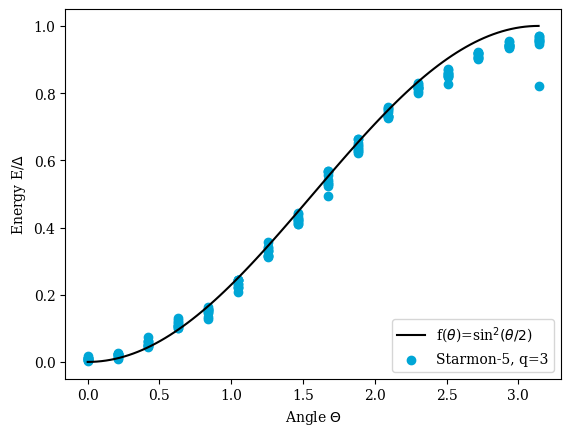

In [7]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(dataZ)):
    plt.scatter(theta,dataZ[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=3"], prop=font, loc="lower right")
plt.show()

## Mean Values & Errors

In [8]:
dataF=np.array(dataZ)
data=dataF.transpose()

In [9]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.00908203125, 0.01953125, 0.0552734375, 0.1125, 0.1494140625, 0.23134765625, 0.32939453125, 0.4244140625, 0.540625, 0.641015625, 0.74150390625, 0.8169921875, 0.8552734375, 0.91181640625, 0.942578125, 0.94521484375]


In [10]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.003707080643769982, 0.005677516349120559, 0.008526906231618388, 0.009928332052452214, 0.010251580837508368, 0.012122362616876261, 0.013361787633936337, 0.010946215835314103, 0.022811463214881814, 0.01396996464238099, 0.012314371809059437, 0.008102526762770132, 0.011692679333668566, 0.007463519064174022, 0.005984981814861157, 0.04191137299881153]


In [11]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.0011722818304236427, 0.001795388311606468, 0.002696444508659737, 0.0031396142652203307, 0.0032418345063862956, 0.0038334276491808093, 0.0042253682534710985, 0.0034614973799395143, 0.007213618052017351, 0.004417690710194355, 0.0038941462870795925, 0.0025622439372824405, 0.0036975498644372597, 0.0023601719602878318, 0.001892617428964944, 0.013253539854112591]


In [12]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.0166015625, 0.02734375, 0.0732421875, 0.130859375, 0.162109375, 0.2451171875, 0.3564453125, 0.443359375, 0.5673828125, 0.6640625, 0.759765625, 0.8291015625, 0.873046875, 0.921875, 0.955078125, 0.9697265625]
Minimum values: [0.00390625, 0.0087890625, 0.0458984375, 0.099609375, 0.1279296875, 0.208984375, 0.3115234375, 0.4091796875, 0.4931640625, 0.6220703125, 0.724609375, 0.7998046875, 0.828125, 0.900390625, 0.9345703125, 0.8212890625]


## Plot mean values with error bars

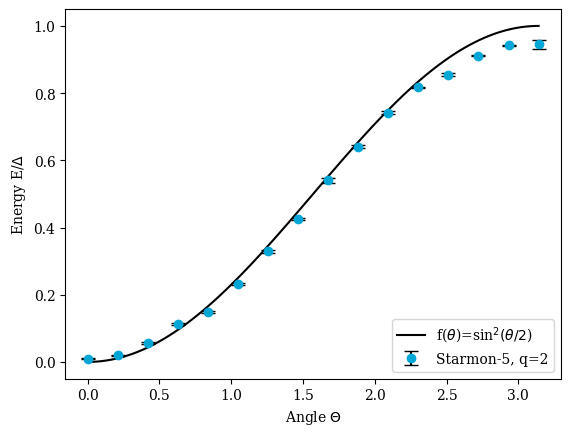

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=2"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q1-error-stdev.png')

In [14]:
max(mean_values)

0.94521484375

## Fit function

In [15]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [18]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

print(fit_a)
print(fit_b)

0.974427624970788
-0.12839620615688072


In [17]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.97443 with standard error of 0.00556.
The value of phi is -0.12840 with standard error of 0.04022.


In [53]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

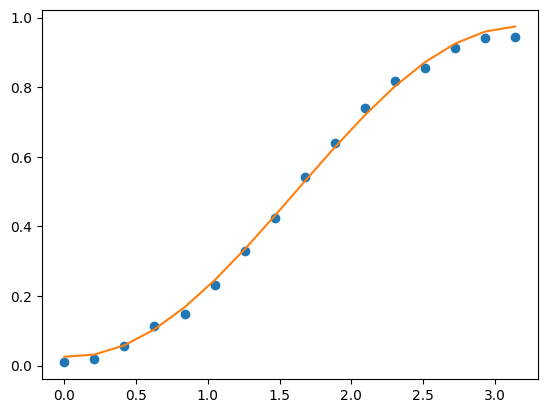

In [54]:
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_sin2 , '-', label='fit')

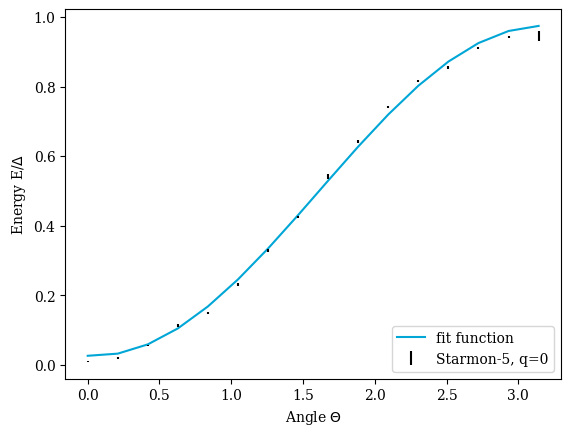

In [55]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "Starmon-5, q=0"], prop=font, loc="lower right")

plt.savefig('starmon-5-q4-fit.png')